# K-Means on Customer dataset

**Author:** jaume manero<br>
**Date created:** 2022/01/05<br>
**Last modified:** 2020/01/05<br>
**Description:** K-means on a customer dataset. Dataset from Kaggle <br>
    https://www.kaggle.com/sahargarmsiri/k-means-clustering/data
        

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('./Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Dataset Visualizations

<AxesSubplot:xlabel='Age', ylabel='Count'>

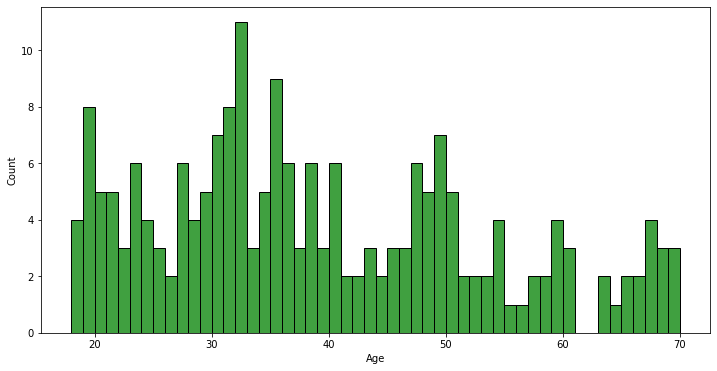

In [131]:

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', color='green',binwidth=2)

Text(0, 0.5, 'Count')

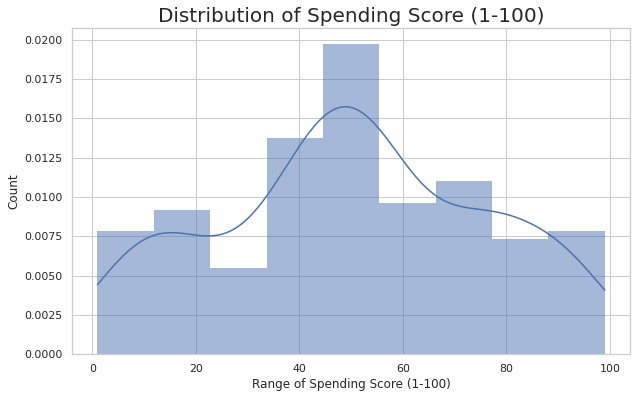

In [135]:
#spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(df['Spending Score (1-100)'] , kde=True, stat="density", linewidth=0)

plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Female age histplot')

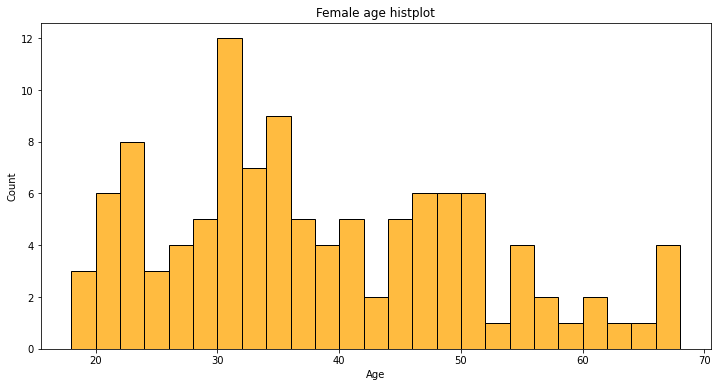

In [15]:
df1 = df[df['Gender']=='Female']
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='Age', color='orange',binwidth=2).set_title('Female age histplot')

Text(0.5, 1.0, 'Male age histplot')

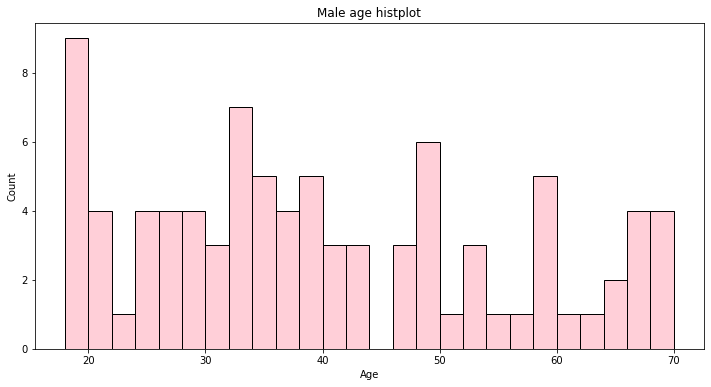

In [16]:
df1 = df[df['Gender']=='Male']
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='Age', color='pink',binwidth=2).set_title('Male age histplot')

<AxesSubplot:xlabel='Age', ylabel='count'>

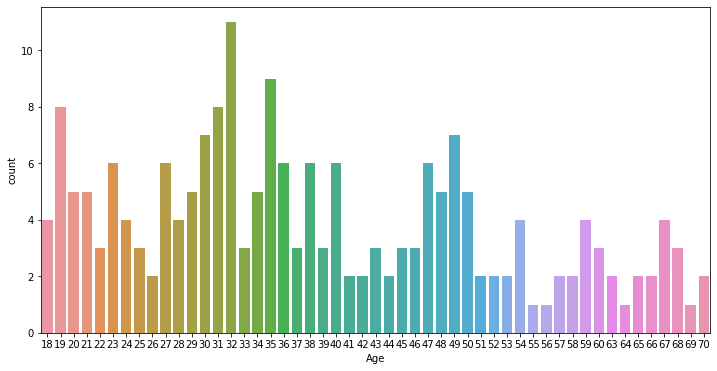

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Age')

### K-Means algorithm

In [123]:
# first we consider only two features relevant for us

In [124]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

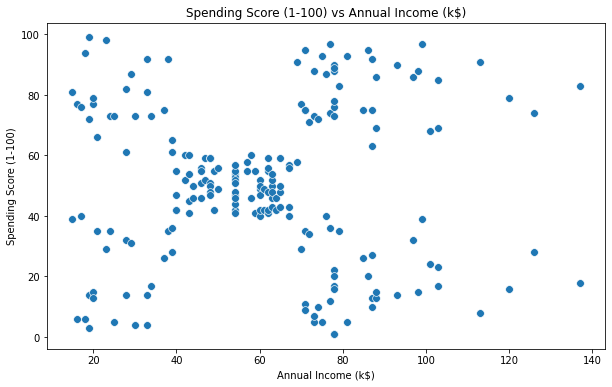

In [125]:
#Scatterplot input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [126]:
model = KMeans(n_clusters=5, n_init=10, max_iter=300, tol = 0.0001, algorithm = 'elkan', random_state=34)
# you can change the clusters and see what happens

cluster_labels = model.fit_predict(X)
X['class'] = list(cluster_labels)

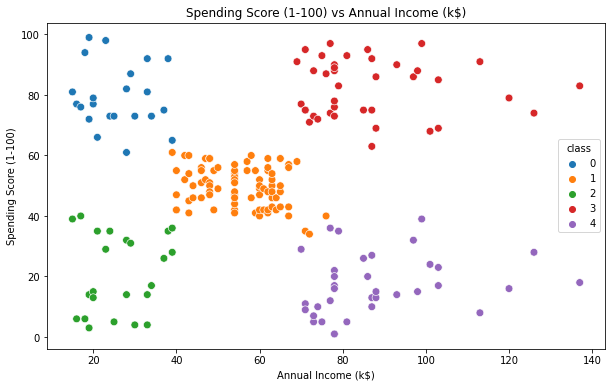

In [127]:
#Scatterplot output  data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue = 'class', data = X  ,
                s = 60, palette = sns.color_palette("tab10",5))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)',)
plt.show()